# 数字图像处理Demo演示

In [1]:
import os

from modules.layout import Layout
from modules.brightness import Brightness
from modules.saturation import Saturation
from modules.utils import Utils
from SCUNet.scunet import Denoising
from Neural_IMage_Assessment.NIMA import NIMA_predict
from portraitNet.pred_img import PortraitSeg
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def print_lines(img, points):
    img = img.copy()
    for pair in Utils.POSE_PAIRS:
        part_from = pair[0]
        part_to = pair[1]
        assert (part_from in Utils.BODY_PARTS)
        assert (part_to in Utils.BODY_PARTS)

        id_from = Utils.BODY_PARTS[part_from]
        id_to = Utils.BODY_PARTS[part_to]

        if points[id_from] and points[id_to]:
            cv2.line(img, points[id_from], points[id_to], (0, 255, 0), 3)
            cv2.ellipse(img, points[id_from], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(img, points[id_to], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)

    return img

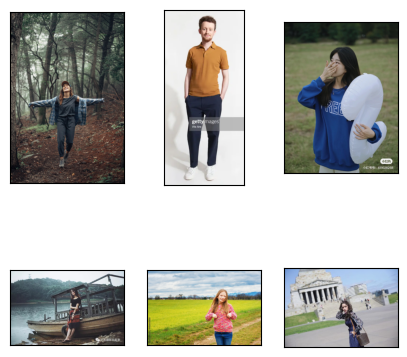

In [3]:
rows, cols = 2, 3

imgs = os.listdir('test_imgs/body/')[:rows * cols]

for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/body/' + imgs[i * cols + j])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
plt.show()

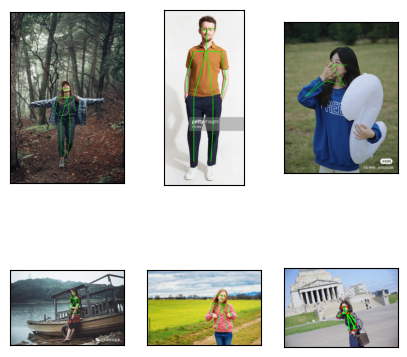

In [4]:
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/body/' + imgs[i * cols + j])
        points = Utils.get_pose_point(image)
        image = print_lines(image, points)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
plt.show()

In [5]:
layout = Layout('./modules/graph_opt.pb')

for i in range(rows):
    for j in range(cols):
        print('---image {}---'.format(i * cols + j))
        image = cv2.imread('test_imgs/body/' + imgs[i * cols + j])
        layout_score = layout.cal_score(image)  # 布局得分
        print('layout_score: ', layout_score)

---image 0---
angle: 2.76°	angle score: 10.00
position score: 10.00
layout_score:  10.0
---image 1---
angle: 2.79°	angle score: 10.00
position score: 3.50
layout_score:  6.75
---image 2---
无法计算人体倾斜的角度
position score: 7.00
layout_score:  7.0
---image 3---
angle: 0.00°	angle score: 10.00
position score: 7.00
layout_score:  8.5
---image 4---
angle: 0.10°	angle score: 10.00
position score: 5.00
layout_score:  7.5
---image 5---
angle: 20.71°	angle score: 0.00
position score: 10.00
layout_score:  5.0


dark_sum:3138453
bright_sum:1
piexs_sum:3538944
dark_prop=dark_sum/piexs_sum:0.8868331909179688
bright_prop=bright_sum/piexs_sum:2.8257016782407406e-07
dark!
brightness score: 5.66
dark_sum:1675442
bright_sum:783
piexs_sum:3538944
dark_prop=dark_sum/piexs_sum:0.4734299271195023
bright_prop=bright_sum/piexs_sum:0.00022125244140625
fine!
brightness score: 10.00
dark_sum:936496
bright_sum:24548
piexs_sum:3538944
dark_prop=dark_sum/piexs_sum:0.26462583188657407
bright_prop=bright_sum/piexs_sum:0.006936532479745371
fine!
brightness score: 10.00
dark_sum:198720
bright_sum:276915
piexs_sum:3538944
dark_prop=dark_sum/piexs_sum:0.05615234375
bright_prop=bright_sum/piexs_sum:0.07824791802300347
fine!
brightness score: 10.00
dark_sum:84200
bright_sum:732827
piexs_sum:3538944
dark_prop=dark_sum/piexs_sum:0.02379240813078704
bright_prop=bright_sum/piexs_sum:0.20707504837601273
bright!
brightness score: 9.33


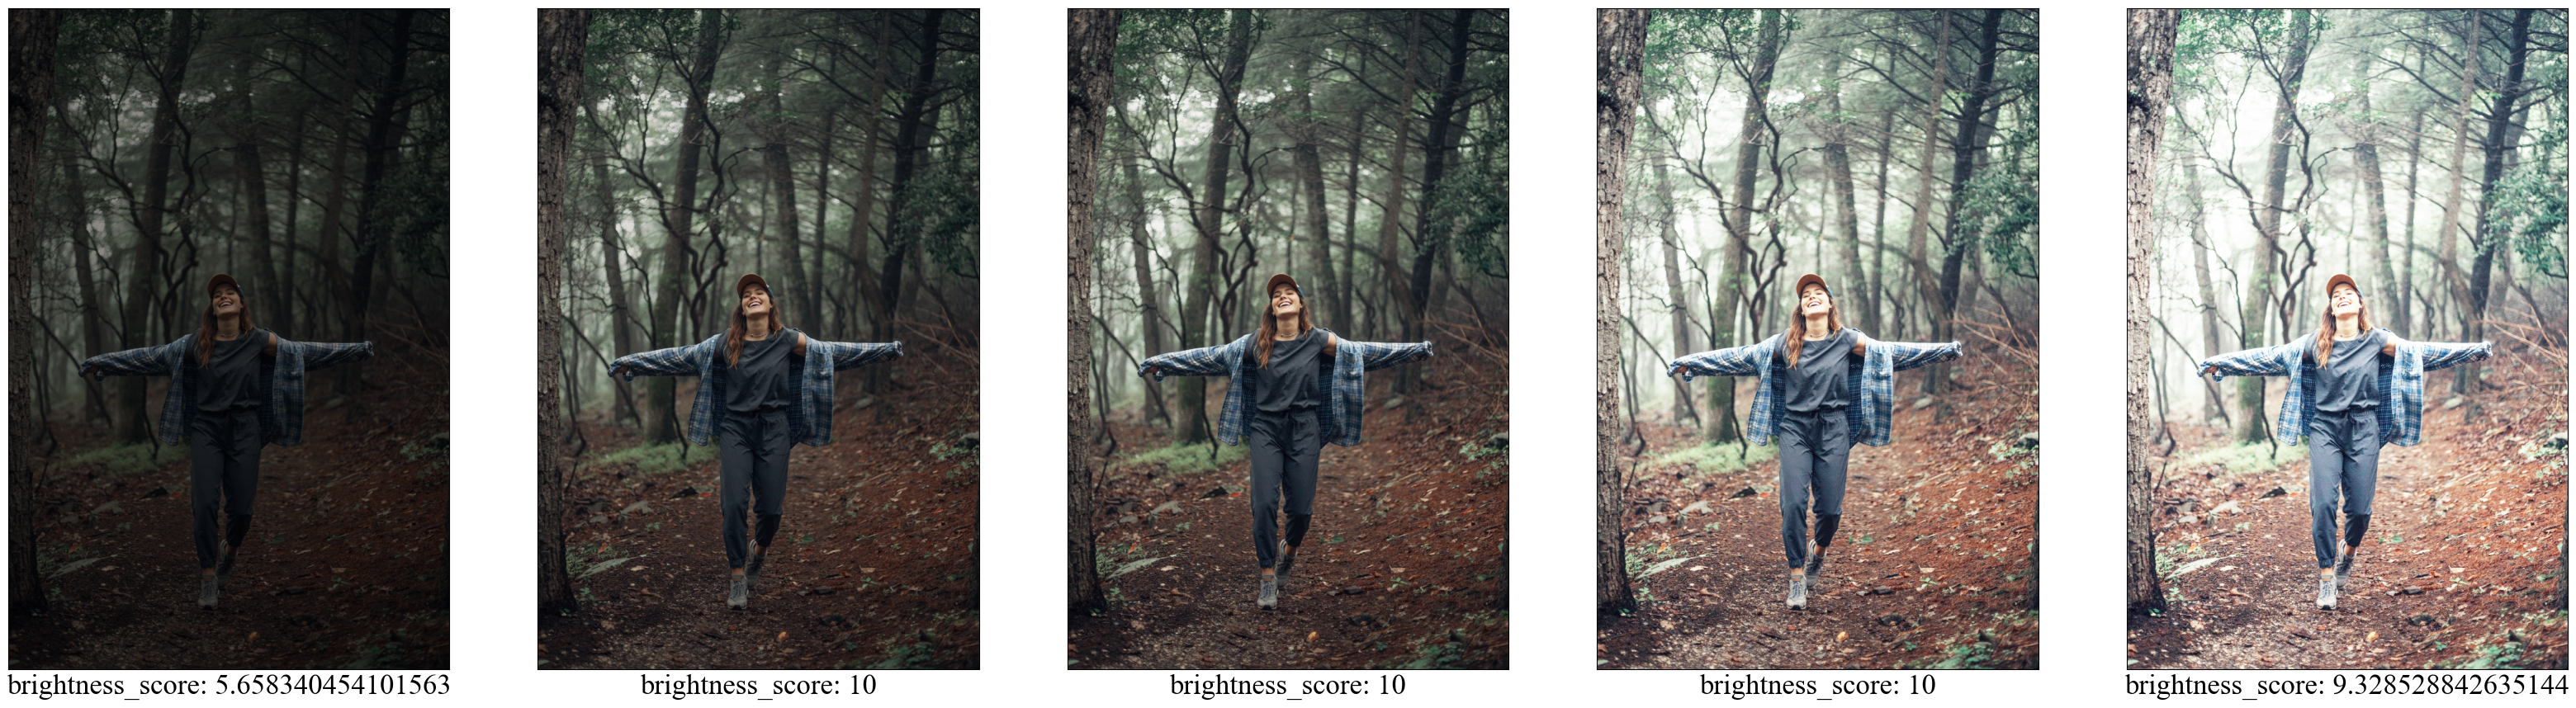

In [6]:
rows, cols = 1, 5
brightness = Brightness()

imgs = os.listdir('test_imgs/brightness/')[:rows * cols]

plt.figure(figsize=(40,12))
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/brightness/' + imgs[i * cols + j])
        brightness_score = brightness.cal_score(image)  # 亮度得分
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xlabel('brightness_score: ' + str(brightness_score), fontdict={'family' : 'Times New Roman', 'size'   : 25})
        plt.xticks([])
        plt.yticks([])
plt.show()